<a href="https://colab.research.google.com/github/Sisterno/ML_RedesNeuronales/blob/master/IT04/Modelo_entrenamiento__IT04_try02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from time import time
import pathlib
 
path_img_leucocitos = "/content/drive/MyDrive/ML/04-dataset-preprocesado-fusion";
pathlib_img_leucocitos=pathlib.Path(path_img_leucocitos)
 
from google.colab import drive
drive.mount('/content/drive')
 
# batch_size = 32
batch_size = 32
img_height = 180
img_width = 180
 
#-------------------------------------------------------------------------------
class TimingCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []
    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time()
    def on_epoch_end(self, batch, logs={}):
        self.times.append(time() - self.epoch_time_start)
#-------------------------------------------------------------------------------
 
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path_img_leucocitos,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path_img_leucocitos,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)
 
AUTOTUNE = tf.data.AUTOTUNE
 
# train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
# train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

Mounted at /content/drive
Found 59877 files belonging to 5 classes.
Using 47902 files for training.
Found 59877 files belonging to 5 classes.
Using 11975 files for validation.


## Modelo DS002-I04-D001

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I04_D001 = TimingCallback()
num_classes = 5

model_I04_D001 = Sequential([
  # layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes)
])
model_I04_D001.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I04_D001.summary()

epochs=20
history_I04_D001 = model_I04_D001.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I04_D001]
)

#-------------------------------------------------------------------------------

Epoch 1/20
375/375 [==============================] - 8606s 22s/step - loss: 21.5496 - accuracy: 0.2649 - val_loss: 1.5636 - val_accuracy: 0.3240
Epoch 2/20
375/375 [==============================] - 108s 283ms/step - loss: 1.5604 - accuracy: 0.3229 - val_loss: 1.5576 - val_accuracy: 0.3240
Epoch 3/20
375/375 [==============================] - 106s 278ms/step - loss: 1.5563 - accuracy: 0.3263 - val_loss: 1.5575 - val_accuracy: 0.3240
Epoch 4/20
375/375 [==============================] - 106s 278ms/step - loss: 1.5556 - accuracy: 0.3268 - val_loss: 1.5575 - val_accuracy: 0.3240
Epoch 5/20
375/375 [==============================] - 106s 279ms/step - loss: 1.5498 - accuracy: 0.3261 - val_loss: 1.5581 - val_accuracy: 0.3240
Epoch 6/20
375/375 [==============================] - 105s 277ms/step - loss: 1.4835 - accuracy: 0.3234 - val_loss: 1.5455 - val_accuracy: 0.3240
Epoch 7/20
375/375 [==============================] - 106s 280ms/step - loss: 1.4464 - accuracy: 0.3352 - val_loss: 1.5331 -

[8605.586656093597, 107.85742497444153, 105.75013279914856, 105.84317135810852, 106.07898259162903, 105.36290574073792, 106.48157501220703, 107.20728063583374, 107.34160089492798, 106.14962124824524, 104.96776461601257, 105.6636278629303, 106.36262369155884, 107.34806871414185, 108.62105369567871, 106.14030337333679, 104.53608870506287, 108.72711372375488, 104.74084377288818, 106.92818713188171]
El entrenamiento se demoro: 10627.695026636124 segundos
El entrenamiento se demoro: 177.1282504439354 minutos
accuracy => 0.8697131872177124
loss => 0.3430776596069336
val_accuracy => 0.8610438704490662
val_loss => 0.38746097683906555


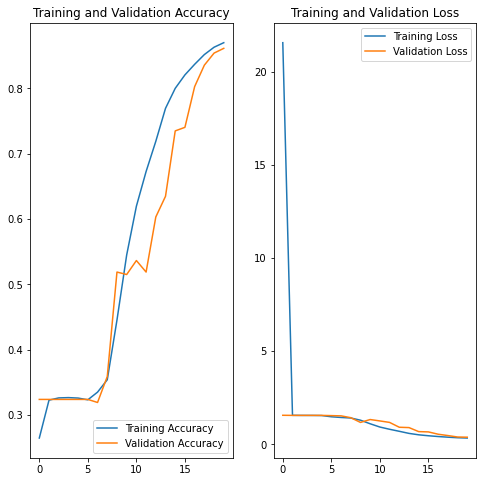

In [ ]:
#-------------------------------------------------------------------------------
print(cb_I04_D001.times)
final_time = 0
for time in cb_I04_D001.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I04_D001.history['accuracy'])))
print('loss => '+ str(min(history_I04_D001.history['loss'])))
print('val_accuracy => '+ str(max(history_I04_D001.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I04_D001.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I04_D001.history['accuracy']
val_acc = history_I04_D001.history['val_accuracy']

loss=history_I04_D001.history['loss']
val_loss=history_I04_D001.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I04-D002

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I04_D002 = TimingCallback()
num_classes = 10

model_I04_D002 = Sequential([
  # layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D (16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model_I04_D002.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I04_D002.summary()

epochs=20
history_I04_D002 = model_I04_D002.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I04_D002]
)

#-------------------------------------------------------------------------------

Epoch 1/20
375/375 [==============================] - 110s 286ms/step - loss: 43.4041 - accuracy: 0.3921 - val_loss: 1.3222 - val_accuracy: 0.4357
Epoch 2/20
375/375 [==============================] - 108s 285ms/step - loss: 1.0856 - accuracy: 0.5593 - val_loss: 1.1808 - val_accuracy: 0.5111
Epoch 3/20
375/375 [==============================] - 107s 281ms/step - loss: 0.9531 - accuracy: 0.6078 - val_loss: 1.0694 - val_accuracy: 0.5691
Epoch 4/20
375/375 [==============================] - 107s 282ms/step - loss: 0.8381 - accuracy: 0.6552 - val_loss: 0.7857 - val_accuracy: 0.6927
Epoch 5/20
375/375 [==============================] - 109s 285ms/step - loss: 0.6981 - accuracy: 0.7161 - val_loss: 0.7579 - val_accuracy: 0.7169
Epoch 6/20
375/375 [==============================] - 111s 292ms/step - loss: 0.6103 - accuracy: 0.7566 - val_loss: 0.5993 - val_accuracy: 0.7799
Epoch 7/20
375/375 [==============================] - 109s 287ms/step - loss: 0.5117 - accuracy: 0.7977 - val_loss: 0.5651 

[110.17833232879639, 108.33589267730713, 106.8537654876709, 107.1444411277771, 108.5108687877655, 111.2113881111145, 109.20001244544983, 109.71485781669617, 106.84813380241394, 109.99188423156738, 111.31742215156555, 107.92097067832947, 107.9483094215393, 111.80941200256348, 107.55023288726807, 112.90763926506042, 107.63189840316772, 111.36736965179443, 111.80519795417786, 117.00651574134827]
El entrenamiento se demoro: 2195.2545449733734 segundos
El entrenamiento se demoro: 36.58757574955622 minutos
accuracy => 0.9421318769454956
loss => 0.1547779142856598
val_accuracy => 0.9262630343437195
val_loss => 0.20120182633399963


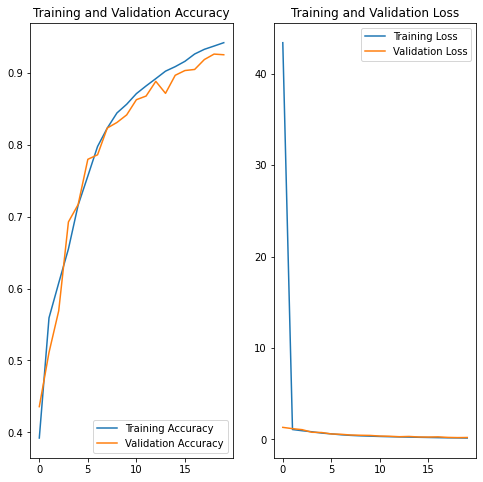

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I04_D002.times)
final_time = 0
for time in cb_I04_D002.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I04_D002.history['accuracy'])))
print('loss => '+ str(min(history_I04_D002.history['loss'])))
print('val_accuracy => '+ str(max(history_I04_D002.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I04_D002.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I04_D002.history['accuracy']
val_acc = history_I04_D002.history['val_accuracy']

loss=history_I04_D002.history['loss']
val_loss=history_I04_D002.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I04-D003

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I04_D003 = TimingCallback()
num_classes = 5
epochs=20

model_I04_D003 = Sequential([
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes)
])
model_I04_D003.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I04_D003.summary()


history_I04_D003 = model_I04_D003.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I04_D003]
)

#-------------------------------------------------------------------------------

Epoch 1/20
749/749 [==============================] - 112s 148ms/step - loss: 24.5290 - accuracy: 0.3360 - val_loss: 1.4727 - val_accuracy: 0.3723
Epoch 2/20
749/749 [==============================] - 112s 149ms/step - loss: 1.2602 - accuracy: 0.4510 - val_loss: 1.2627 - val_accuracy: 0.5039
Epoch 3/20
749/749 [==============================] - 113s 150ms/step - loss: 1.0302 - accuracy: 0.5811 - val_loss: 1.0496 - val_accuracy: 0.5885
Epoch 4/20
749/749 [==============================] - 112s 149ms/step - loss: 0.8041 - accuracy: 0.6682 - val_loss: 0.7685 - val_accuracy: 0.6821
Epoch 5/20
749/749 [==============================] - 111s 148ms/step - loss: 0.7406 - accuracy: 0.6953 - val_loss: 0.7607 - val_accuracy: 0.6932
Epoch 6/20
749/749 [==============================] - 111s 147ms/step - loss: 0.6716 - accuracy: 0.7191 - val_loss: 0.7130 - val_accuracy: 0.7041
Epoch 7/20
749/749 [==============================] - 111s 147ms/step - loss: 0.6062 - accuracy: 0.7613 - val_loss: 0.6689 

[112.37361931800842, 112.47367811203003, 112.96587753295898, 112.12272024154663, 111.46414995193481, 111.00726580619812, 110.81419014930725, 111.39912438392639, 111.4483573436737, 111.07213425636292, 112.21783089637756, 112.00874948501587, 111.43912434577942, 112.29983043670654, 111.75353479385376, 111.8654317855835, 111.26932644844055, 110.72789311408997, 111.3000111579895, 110.60515308380127]
El entrenamiento se demoro: 2232.628002643585 segundos
El entrenamiento se demoro: 37.21046671072642 minutos
accuracy => 0.9202747344970703
loss => 0.23766906559467316
val_accuracy => 0.89620041847229
val_loss => 0.3371424674987793


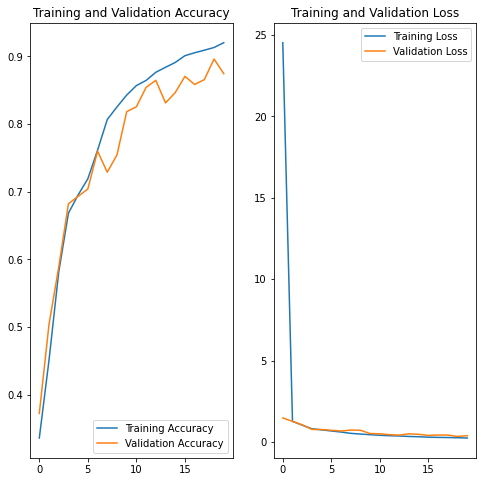

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I04_D003.times)
final_time = 0
for time in cb_I04_D003.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I04_D003.history['accuracy'])))
print('loss => '+ str(min(history_I04_D003.history['loss'])))
print('val_accuracy => '+ str(max(history_I04_D003.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I04_D003.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I04_D003.history['accuracy']
val_acc = history_I04_D003.history['val_accuracy']

loss=history_I04_D003.history['loss']
val_loss=history_I04_D003.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I04-D004

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I04_D004 = TimingCallback()
num_classes = 5

model_I04_D004 = Sequential([
  # layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.5),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes)
])
model_I04_D004.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I04_D004.summary()

epochs=20
history_I04_D004 = model_I04_D004.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I04_D004]
)

#-------------------------------------------------------------------------------

Epoch 1/20
1497/1497 [==============================] - 7704s 5s/step - loss: 6.0321 - accuracy: 0.3217 - val_loss: 1.5347 - val_accuracy: 0.2875
Epoch 2/20
1497/1497 [==============================] - 126s 84ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1.5341 - val_accuracy: 0.2907
Epoch 3/20
1497/1497 [==============================] - 124s 83ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1.5341 - val_accuracy: 0.2907
Epoch 4/20
1497/1497 [==============================] - 125s 83ms/step - loss: 1.5556 - accuracy: 0.3270 - val_loss: 1.5574 - val_accuracy: 0.3240
Epoch 5/20
1497/1497 [==============================] - 124s 82ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1.5574 - val_accuracy: 0.3240
Epoch 6/20
1497/1497 [==============================] - 124s 83ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1.5574 - val_accuracy: 0.3240
Epoch 7/20
1497/1497 [==============================] - 124s 83ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1.

[7703.751301288605, 125.73580884933472, 124.47143745422363, 124.91740727424622, 123.75933194160461, 123.98411345481873, 124.45349431037903, 123.2668764591217, 125.48774456977844, 124.43942713737488, 125.44864559173584, 122.51723766326904, 122.700364112854, 121.71667075157166, 122.3768002986908, 122.38195204734802, 122.0872073173523, 123.05494546890259, 122.38006496429443, 122.44352698326111]
El entrenamiento se demoro: 10051.374357938766 segundos
El entrenamiento se demoro: 167.52290596564612 minutos
accuracy => 0.3270009458065033
loss => 1.555485486984253
val_accuracy => 0.32400834560394287
val_loss => 1.5341212749481201


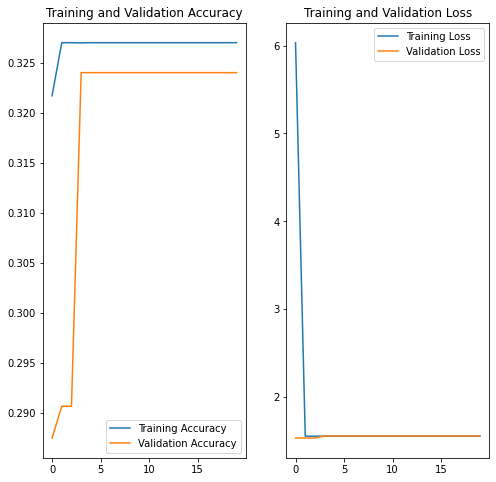

In [ ]:
#-------------------------------------------------------------------------------
print(cb_I04_D004.times)
final_time = 0
for time in cb_I04_D004.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I04_D004.history['accuracy'])))
print('loss => '+ str(min(history_I04_D004.history['loss'])))
print('val_accuracy => '+ str(max(history_I04_D004.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I04_D004.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I04_D004.history['accuracy']
val_acc = history_I04_D004.history['val_accuracy']

loss=history_I04_D004.history['loss']
val_loss=history_I04_D004.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I04-D005

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I04_D005 = TimingCallback()
num_classes = 10

model_I04_D005 = Sequential([
  # layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D (16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.5),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model_I04_D005.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I04_D005.summary()

epochs=20
history_I04_D005 = model_I04_D005.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I04_D005]
)

#-------------------------------------------------------------------------------

Epoch 1/20
94/94 [==============================] - 114s 1s/step - loss: 285.4664 - accuracy: 0.2449 - val_loss: 2.2212 - val_accuracy: 0.1773
Epoch 2/20
94/94 [==============================] - 107s 1s/step - loss: 1.8012 - accuracy: 0.2712 - val_loss: 2.1101 - val_accuracy: 0.1486
Epoch 3/20
94/94 [==============================] - 107s 1s/step - loss: 1.6958 - accuracy: 0.2802 - val_loss: 1.8955 - val_accuracy: 0.1486
Epoch 4/20
94/94 [==============================] - 107s 1s/step - loss: 1.6271 - accuracy: 0.2883 - val_loss: 1.6659 - val_accuracy: 0.1836
Epoch 5/20
94/94 [==============================] - 107s 1s/step - loss: 1.5805 - accuracy: 0.3010 - val_loss: 1.4411 - val_accuracy: 0.4551
Epoch 6/20
94/94 [==============================] - 107s 1s/step - loss: 1.5201 - accuracy: 0.3291 - val_loss: 1.4451 - val_accuracy: 0.2907
Epoch 7/20
94/94 [==============================] - 107s 1s/step - loss: 1.4778 - accuracy: 0.3556 - val_loss: 1.5630 - val_accuracy: 0.2558
Epoch 8/20


[113.99845027923584, 107.34848690032959, 107.39892840385437, 107.02201700210571, 106.85146570205688, 107.04030990600586, 107.24992084503174, 106.94325828552246, 107.0797700881958, 106.83580780029297, 106.8692672252655, 106.67022347450256, 106.99145078659058, 106.49984979629517, 107.0455915927887, 106.25889563560486, 106.87871861457825, 106.71036863327026, 106.9975814819336, 106.81334519386292]
El entrenamiento se demoro: 2145.5037076473236 segundos
El entrenamiento se demoro: 35.758395127455394 minutos
accuracy => 0.536136269569397
loss => 1.1382274627685547
val_accuracy => 0.47465553879737854
val_loss => 1.2792644500732422


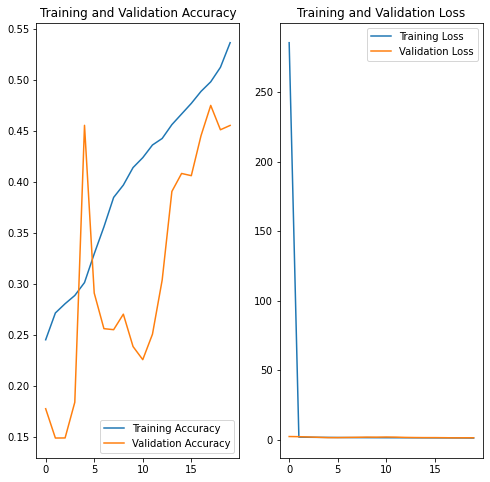

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I04_D005.times)
final_time = 0
for time in cb_I04_D005.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I04_D005.history['accuracy'])))
print('loss => '+ str(min(history_I04_D005.history['loss'])))
print('val_accuracy => '+ str(max(history_I04_D005.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I04_D005.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I04_D005.history['accuracy']
val_acc = history_I04_D005.history['val_accuracy']

loss=history_I04_D005.history['loss']
val_loss=history_I04_D005.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I04-D006

In [7]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I04_D006 = TimingCallback()
num_classes = 5
epochs=20

model_I04_D006 = Sequential([
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.5),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes)
])
model_I04_D006.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I04_D006.summary()


history_I04_D006 = model_I04_D006.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I04_D006]
)

#-------------------------------------------------------------------------------

Epoch 1/20
1497/1497 [==============================] - 121s 80ms/step - loss: 8.0578 - accuracy: 0.3209 - val_loss: 1.5579 - val_accuracy: 0.3235
Epoch 2/20
1497/1497 [==============================] - 120s 80ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1.5578 - val_accuracy: 0.3235
Epoch 3/20
1497/1497 [==============================] - 119s 79ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1.5577 - val_accuracy: 0.3238
Epoch 4/20
1497/1497 [==============================] - 120s 80ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1.5577 - val_accuracy: 0.3238
Epoch 5/20
1497/1497 [==============================] - 119s 79ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1.5577 - val_accuracy: 0.3238
Epoch 6/20
1497/1497 [==============================] - 119s 79ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1.5577 - val_accuracy: 0.3238
Epoch 7/20
1497/1497 [==============================] - 119s 79ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1

[120.6487147808075, 120.23429250717163, 118.99960541725159, 119.51888847351074, 119.151526927948, 119.08253979682922, 119.29773044586182, 119.07493805885315, 119.56354594230652, 119.08944368362427, 121.47277593612671, 121.41508626937866, 121.9806272983551, 122.44765663146973, 122.2237982749939, 122.7983751296997, 122.78747463226318, 123.57601976394653, 122.82624816894531, 122.34350824356079]
El entrenamiento se demoro: 2418.532796382904 segundos
El entrenamiento se demoro: 40.30887993971507 minutos
accuracy => 0.3270009458065033
loss => 1.5554673671722412
val_accuracy => 0.32400834560394287
val_loss => 1.5574325323104858


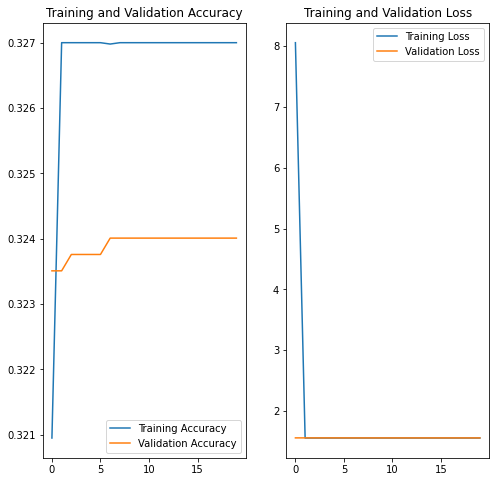

In [8]:
#-------------------------------------------------------------------------------

print(cb_I04_D006.times)
final_time = 0
for time in cb_I04_D006.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I04_D006.history['accuracy'])))
print('loss => '+ str(min(history_I04_D006.history['loss'])))
print('val_accuracy => '+ str(max(history_I04_D006.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I04_D006.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I04_D006.history['accuracy']
val_acc = history_I04_D006.history['val_accuracy']

loss=history_I04_D006.history['loss']
val_loss=history_I04_D006.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I04-D007

In [5]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I04_D007 = TimingCallback()
num_classes = 5

model_I04_D007 = Sequential([
  # layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.75),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.75),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.75),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes)
])
model_I04_D007.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I04_D007.summary()

epochs=20
history_I04_D007 = model_I04_D007.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I04_D007]
)

#-------------------------------------------------------------------------------

Epoch 1/20
1497/1497 [==============================] - 123s 82ms/step - loss: 7.5470 - accuracy: 0.3246 - val_loss: 1.5220 - val_accuracy: 0.3240
Epoch 2/20
1497/1497 [==============================] - 121s 81ms/step - loss: 1.5564 - accuracy: 0.3270 - val_loss: 1.5574 - val_accuracy: 0.3240
Epoch 3/20
1497/1497 [==============================] - 120s 80ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1.5574 - val_accuracy: 0.3240
Epoch 4/20
1497/1497 [==============================] - 120s 80ms/step - loss: 1.5558 - accuracy: 0.3270 - val_loss: 1.5574 - val_accuracy: 0.3240
Epoch 5/20
1497/1497 [==============================] - 123s 82ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1.5574 - val_accuracy: 0.3240
Epoch 6/20
1497/1497 [==============================] - 122s 81ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1.5574 - val_accuracy: 0.3240
Epoch 7/20
1497/1497 [==============================] - 123s 82ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1

[122.92627143859863, 121.19140124320984, 120.37290143966675, 120.20566868782043, 122.80567002296448, 122.289222240448, 122.97596144676208, 123.0988495349884, 123.45307946205139, 122.76992774009705, 123.5853168964386, 123.66431999206543, 123.38229870796204, 122.88129448890686, 123.01178860664368, 122.53586411476135, 122.88077211380005, 122.91960048675537, 122.46926021575928, 121.51441812515259]
El entrenamiento se demoro: 2450.9338870048523 segundos
El entrenamiento se demoro: 40.84889811674754 minutos
accuracy => 0.3270009458065033
loss => 1.5554637908935547
val_accuracy => 0.32400834560394287
val_loss => 1.5220341682434082


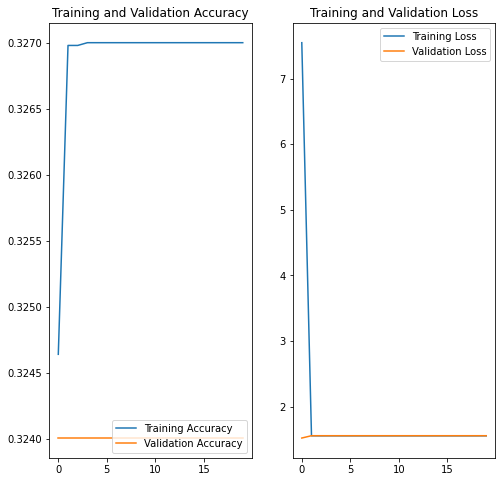

In [6]:
#-------------------------------------------------------------------------------
print(cb_I04_D007.times)
final_time = 0
for time in cb_I04_D007.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I04_D007.history['accuracy'])))
print('loss => '+ str(min(history_I04_D007.history['loss'])))
print('val_accuracy => '+ str(max(history_I04_D007.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I04_D007.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I04_D007.history['accuracy']
val_acc = history_I04_D007.history['val_accuracy']

loss=history_I04_D007.history['loss']
val_loss=history_I04_D007.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I04-D008

In [10]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I04_D008 = TimingCallback()
num_classes = 10
 
model_I04_D008 = Sequential([
  # layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D (16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.75),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.75),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.75),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model_I04_D008.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I04_D008.summary()
 
epochs=20
history_I04_D008 = model_I04_D008.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I04_D008]
)
 
#-------------------------------------------------------------------------------

Epoch 1/20
1497/1497 [==============================] - 128s 85ms/step - loss: 19.5159 - accuracy: 0.2540 - val_loss: 1.6409 - val_accuracy: 0.3240
Epoch 2/20
1497/1497 [==============================] - 128s 85ms/step - loss: 1.5800 - accuracy: 0.3180 - val_loss: 1.5687 - val_accuracy: 0.3240
Epoch 3/20
1497/1497 [==============================] - 129s 86ms/step - loss: 1.3197 - accuracy: 0.4407 - val_loss: 1.6919 - val_accuracy: 0.3240
Epoch 4/20
1497/1497 [==============================] - 129s 86ms/step - loss: 1.0716 - accuracy: 0.5299 - val_loss: 1.7142 - val_accuracy: 0.2405
Epoch 5/20
1497/1497 [==============================] - 128s 86ms/step - loss: 0.9376 - accuracy: 0.5921 - val_loss: 1.9092 - val_accuracy: 0.2200
Epoch 6/20
1497/1497 [==============================] - 129s 86ms/step - loss: 0.8441 - accuracy: 0.6331 - val_loss: 1.8304 - val_accuracy: 0.1913
Epoch 7/20
1497/1497 [==============================] - 129s 86ms/step - loss: 0.7607 - accuracy: 0.6758 - val_loss: 

[128.00126838684082, 127.5662088394165, 128.69965362548828, 128.62078833580017, 128.44154906272888, 128.6763744354248, 128.50800800323486, 128.51837182044983, 127.75264048576355, 127.84502363204956, 128.14658665657043, 128.00296568870544, 127.72737526893616, 126.74900555610657, 128.31758379936218, 127.84615683555603, 128.61249113082886, 127.71536231040955, 127.55160641670227, 127.9363043308258]
El entrenamiento se demoro: 2561.2353246212006 segundos
El entrenamiento se demoro: 42.687255410353345 minutos
accuracy => 0.7667946815490723
loss => 0.5898909568786621
val_accuracy => 0.34881001710891724
val_loss => 1.550350308418274


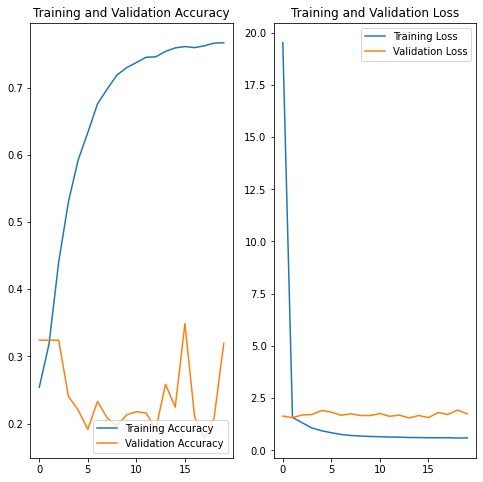

In [11]:
#-------------------------------------------------------------------------------

print(cb_I04_D008.times)
final_time = 0
for time in cb_I04_D008.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I04_D008.history['accuracy'])))
print('loss => '+ str(min(history_I04_D008.history['loss'])))
print('val_accuracy => '+ str(max(history_I04_D008.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I04_D008.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I04_D008.history['accuracy']
val_acc = history_I04_D008.history['val_accuracy']

loss=history_I04_D008.history['loss']
val_loss=history_I04_D008.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I04-D009

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I04_D009 = TimingCallback()
num_classes = 5
epochs=20

model_I04_D009 = Sequential([
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.75),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.75),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes)
])
model_I04_D009.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I04_D009.summary()


history_I04_D009 = model_I04_D009.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I04_D009]
)

#-------------------------------------------------------------------------------

Epoch 1/20
24/24 [==============================] - 136s 4s/step - loss: 778.2041 - accuracy: 0.2059 - val_loss: 1.6082 - val_accuracy: 0.2120
Epoch 2/20
24/24 [==============================] - 121s 4s/step - loss: 1.6068 - accuracy: 0.2831 - val_loss: 1.6052 - val_accuracy: 0.3240
Epoch 3/20
24/24 [==============================] - 120s 4s/step - loss: 1.6035 - accuracy: 0.3270 - val_loss: 1.6019 - val_accuracy: 0.3240
Epoch 4/20
24/24 [==============================] - 119s 4s/step - loss: 1.6001 - accuracy: 0.3270 - val_loss: 1.5985 - val_accuracy: 0.3240
Epoch 5/20
24/24 [==============================] - 119s 4s/step - loss: 1.5967 - accuracy: 0.3270 - val_loss: 1.5951 - val_accuracy: 0.3240
Epoch 6/20
24/24 [==============================] - 119s 4s/step - loss: 1.5933 - accuracy: 0.3270 - val_loss: 1.5919 - val_accuracy: 0.3240
Epoch 7/20
24/24 [==============================] - 119s 4s/step - loss: 1.5900 - accuracy: 0.3270 - val_loss: 1.5888 - val_accuracy: 0.3240
Epoch 8/20


[135.7771291732788, 121.09941530227661, 120.38856530189514, 118.8826277256012, 118.72190380096436, 118.77239871025085, 119.124929189682, 119.20639061927795, 118.58996248245239, 118.79162979125977, 118.97864747047424, 119.08938694000244, 120.26459860801697, 120.38462662696838, 119.38546705245972, 119.261794090271, 119.48549294471741, 119.49792766571045, 119.78173542022705, 119.66920733451843]
El entrenamiento se demoro: 2405.153836250305 segundos
El entrenamiento se demoro: 40.08589727083842 minutos
accuracy => 0.3270009458065033
loss => 1.563626766204834
val_accuracy => 0.32400834560394287
val_loss => 1.5644317865371704


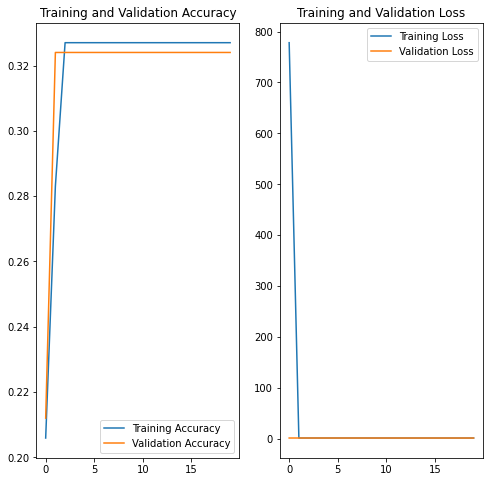

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I04_D009.times)
final_time = 0
for time in cb_I04_D009.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I04_D009.history['accuracy'])))
print('loss => '+ str(min(history_I04_D009.history['loss'])))
print('val_accuracy => '+ str(max(history_I04_D009.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I04_D009.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I04_D009.history['accuracy']
val_acc = history_I04_D009.history['val_accuracy']

loss=history_I04_D009.history['loss']
val_loss=history_I04_D009.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()